# Bank Customer Churn Prediction

## Problem Statement

In the face of increasing competition within the banking industry, identifying and mitigating customer churn has become a critical concern for our institution. This project aims to develop a predictive model for bank customer churn, leveraging historical transactional and interaction data. By employing advanced analytics and machine learning techniques, we seek to proactively identify at-risk customers, enabling targeted retention strategies and ultimately fostering long-term customer loyalty.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.float_format', lambda x:'%.3f' % x)
import matplotlib.pyplot as plt
import seaborn as sb
# Configure default settings for plots
sb.set(style='ticks')
sb.set_palette('Paired')
plt.rcParams['axes.spines.top'] = False    # Remove top border
plt.rcParams['axes.spines.right'] = False  # Remove right border

# Data Dictionary

It is the dataset of a U.S. bank customer for getting the information that, this particular customer will leave bank or not. Various Bank detail is given like CustomerID , surname, Credit score and many more.


# Load Data

In [2]:
data = pd.read_csv("../Data/Raw/Churn_Modelling.csv")
data.shape # (rows, columns)

(10000, 14)

🔎 **Observations**: The data has 10000 rows (records) and 14 columns (features).

In [3]:
# Create a copy of the raw/original data in memory for future usage
df = data.copy()

# Data Overview

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [5]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


🔎 **Observations:**

- It seems there is no null value, but it's better to check against 0s.
- RowNumber, CustomerId and Surname are identifier columns so there are no predictive power on the model. That's why they can be dropped.
- It seems there a no mismatching data types

In [7]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

## Checking for Missing Values

In [8]:
def check_missing_values(data):
  '''
    Prints the number of features with missing values and it's percentage
    in the dataset.
    Displayes a heatmap plot for the missing values.
    ---
    ###Parameters
    data <dataframe>: tabular data in data frame format.
  '''
  count = data.isnull().sum()[data.isnull().sum() > 0]
  percentage = (count / data.shape[0]) * 100

  print(count.shape[0], 'columns has missing values')
  print('-'*50)
  print(pd.DataFrame({'Count':count, 'Percentage %':percentage}))

  plt.figure(figsize=(10, 6))
  sb.heatmap(data.isnull(), yticklabels=False, cmap='cividis', cbar=False)
  plt.show(block=False)

0 columns has missing values
--------------------------------------------------
Empty DataFrame
Columns: [Count, Percentage %]
Index: []


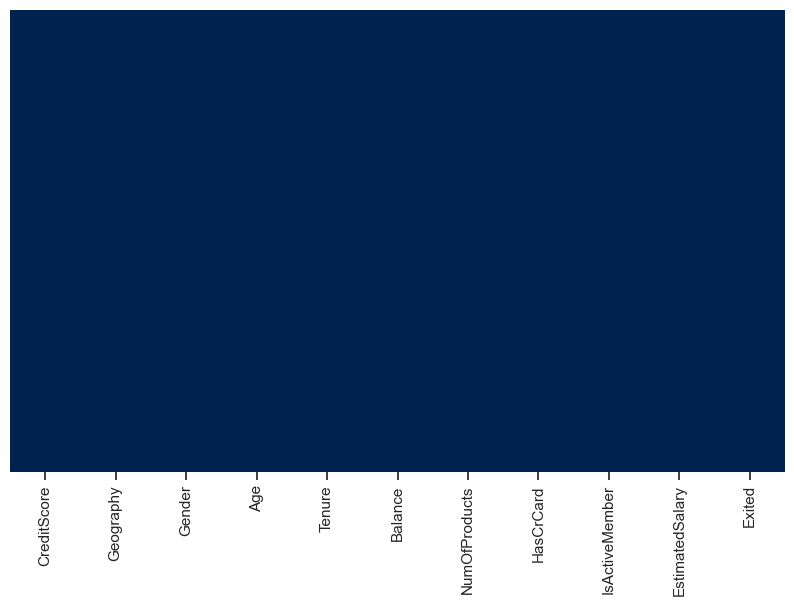

In [9]:
check_missing_values(df)

## Checking Duplicates

In [10]:
df.duplicated().sum()

0

🔎 **Observations:** The dataset has no duplicate records and no missing values.

## Summary Statistics

Before getting the summary statistics we need to be sure that all of the data types are correct in the dataset. Let's fix the data types for the below columns:

- HasCrCard
- IsActiveMember
- Exited

These columns should have categorical values.

In [11]:
bool_features = ['HasCrCard', 'IsActiveMember', 'Exited']
df[bool_features] = df[bool_features].astype('object')

In [12]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,NaN,NaN,NaN,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.000,NaN,NaN,NaN,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,NaN,NaN,NaN,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,NaN,NaN,NaN,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,NaN,NaN,NaN,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,2.000,1.000,7055.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsActiveMember,10000.000,2.000,1.000,5151.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EstimatedSalary,10000.000,NaN,NaN,NaN,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


🔎 **Observations:** 
- Median and the mean values of CreditScore are very close to each other an we can say that the data is normally distributed.
- The Age of the customers varies from 18 to 92 years old with mean value of 38.
- The Balance in their account changes from 0 to almost 251000.
- The maximum number of product (NumOfProducts) that a customer has is 4.
- Majority of the customers has a credit card of the bank.

# Exploratory Data Analysis (EDA) and Visualization

## Univariate Analysis

In [13]:
# Create lists for categorical and numeric columns
cat_cols = []
num_cols = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        num_cols.append(column)
    elif pd.api.types.is_object_dtype(df[column]):
        cat_cols.append(column)
        
print('Categorical features:', cat_cols)
print('Numeric features:', num_cols)

Categorical features: ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
Numeric features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


### Categorical Features

In [14]:
# Function to create labeled barplots for categorical features
def plot_counts(data, feature, perc = False, n = None, hue = None):
  """
    This function takes the name of the feature and plots the distribution
    of the categorical values and saves the figure for future usage using
    countplot function of seaborn.

    ---
    ### Parameters:
    - data <dataframe>: tabular data in data frame format.
    - feature <string>: Name of categorical column in dataframe to be visualized.
    - perc <bool>: whether to display percentages instead of count (default is False)
    - n <int>: displays the top n category levels (default is None, i.e., display all levels)
  """

  total = len(data[feature])            # How many number of rows are there in the feature?
  num_unique = data[feature].nunique()  # How many unique number of category are there in the feature?

  # Set the size of the figure according to the number of categories to be displayed
  if n is None:
    plt.figure(figsize = (num_unique+1, 5))
  else:
    plt.figure(figsize = (n+1, 5))

  # Set the style of the ticks on x axis
  plt.xticks(rotation=90, fontsize=12)

  # Plot the counts for each category
  ax = sb.countplot(
      data=data,
      x = feature,
      palette = 'Paired',
      order = data[feature].value_counts().index[:n].sort_values(),
      hue = hue
  )

  # Display the percentage of each category on top of the bar
  for p in ax.patches:
    if perc == True:
      label = '{:.1f}%'.format(
          100 * p.get_height() / total  # Display percentage of each class of the category
      )
    else:
      label = p.get_height() # Display count of each level of the category

    x = p.get_x() + p.get_width() / 2 # Width of the plot
    y = p.get_height() # Height of the plot

    rotation = 0
    if hue is not None:
      rotation = 30  # Rotate annotations by 30 degrees if hue is not None


    ax.annotate(
        label,
        (x, y),
        ha = 'center',
        va = 'center',
        size = 12,
        xytext = (0, 5),
        textcoords = 'offset points',
        rotation = rotation
    )
  plt.show()

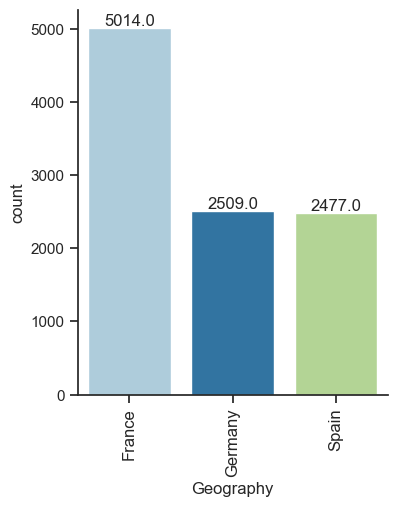

In [15]:
plot_counts(df, 'Geography')

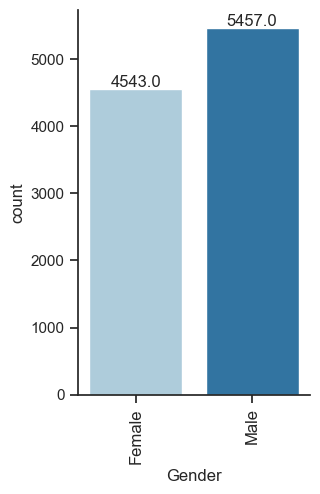

In [16]:
plot_counts(df, 'Gender')

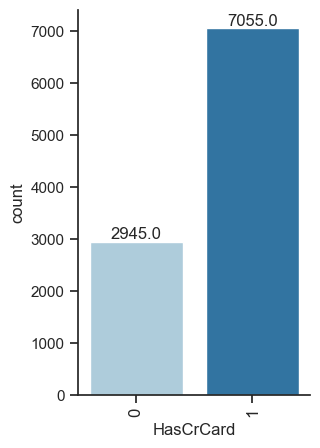

In [17]:
plot_counts(df, 'HasCrCard')

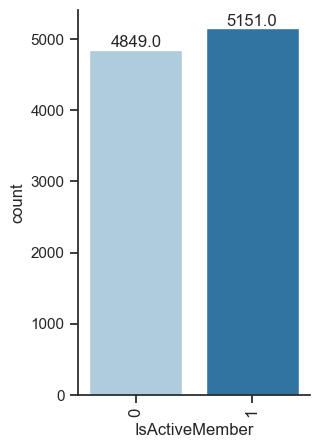

In [18]:
plot_counts(df, 'IsActiveMember')

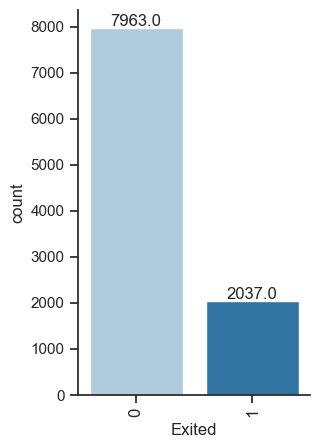

In [19]:
plot_counts(df, 'Exited')

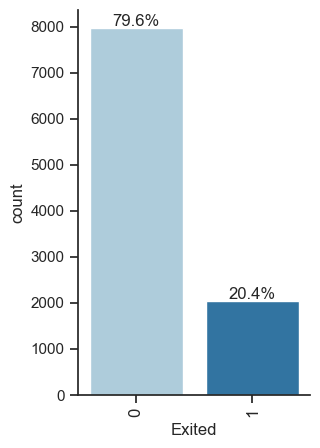

In [20]:
plot_counts(df, 'Exited', perc=True)

🔎 **Observations:** Above plots are aligned with the Observations that we highlithed in the Summary Statistics section. The only additional insight worth to mention here is the dataset is imbalanced. Only the 20% of the overall data provides information about exited customers. That's why we should carefully choose the performance metric of the classification model and it **should not use accuracy**. 

$$Precision = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

$$Recall = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

Prioritizing the **maximization of Recall** over Precision might be a better choice for this problem as the cost of false negatives is higher than the cost of false positives.

Let's check the distribution of the numeric features.

### Numeric Features

In [21]:
num_cols

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [22]:
# A function to display the both the histogram and the boxplot of a numeric column
def dist_plot(data, feature):
  '''
        This function takes the name of the feature and
        plots the distribution of the numeric values
        both using boxplot and hisplot of seaborn.
        The purpose is to check if the numeric feature has
        normal distribution and detect outliers manualy.
        Skewness and kurtosis values of the data are also
        shown.

        ---
        ### Parameters
        - data <dataframe>: tabular data in data frame format.
        - feature <string>: Name of numeric column in dataframe to be visualized.
  '''

  # Create the canvas with 2 sub-plots in rows with 0.15 to 0.85 ratio
  fig, (ax_box, ax_hist) = plt.subplots(
      nrows = 2,
      sharex = True,
      gridspec_kw = {'height_ratios':(0.15, 0.84)},
      figsize = (12, 6)
  )

  # Add the boxblot to the canvas in the first row
  sb.boxplot(
      data = data,
      x = feature,
      color = 'lightblue',
      showmeans = True,
      ax = ax_box
  )
  ax_box.set_xlabel('') # Remove the label from the x axis of the boxplot

  sb.histplot(
      data = data,
      x = feature,
      kde = True,
      ax = ax_hist
  )
  ax_hist.set_xlabel('') # Remove the label from the x axis of the histogram

  # Calculate the skewness and kurtosis
  skewness = data[feature].skew()
  kurt = data[feature].kurt()
  # Add skewness and kurtosis as text on the histogram plot
  ax_hist.text(
      0.95, 0.85,
      f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}',
      transform = ax_hist.transAxes,
      verticalalignment = 'top',
      horizontalalignment = 'right',
      bbox = dict(facecolor='white', edgecolor='gray', boxstyle='round, pad=0.5')
  )

  # Calculcate mean and median values of the feature
  mean_value = data[feature].mean()
  median_value = data[feature].median()

  # Add these values as a vertical line to the histogram
  ax_hist.axvline(mean_value, color='green', linestyle='dotted', linewidth=2, label='Mean')
  ax_hist.axvline(median_value, color='purple', linestyle='dotted', linewidth=2, label='Median')

  # Add legends
  ax_hist.legend(loc='lower right')

  plt.suptitle(feature)
  plt.tight_layout()
  plt.ticklabel_format(style='plain', axis='x')
  plt.show()

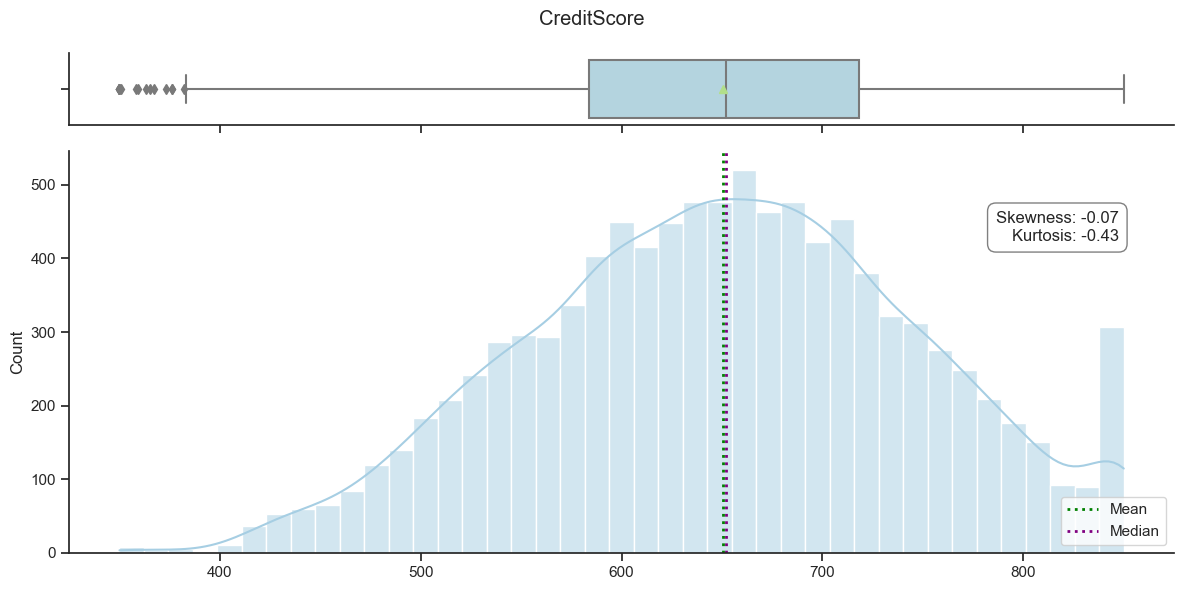

In [23]:
dist_plot(df, 'CreditScore')

🔎 **Observations:** Slightly right skewed normal distribution. Almost no outliers.

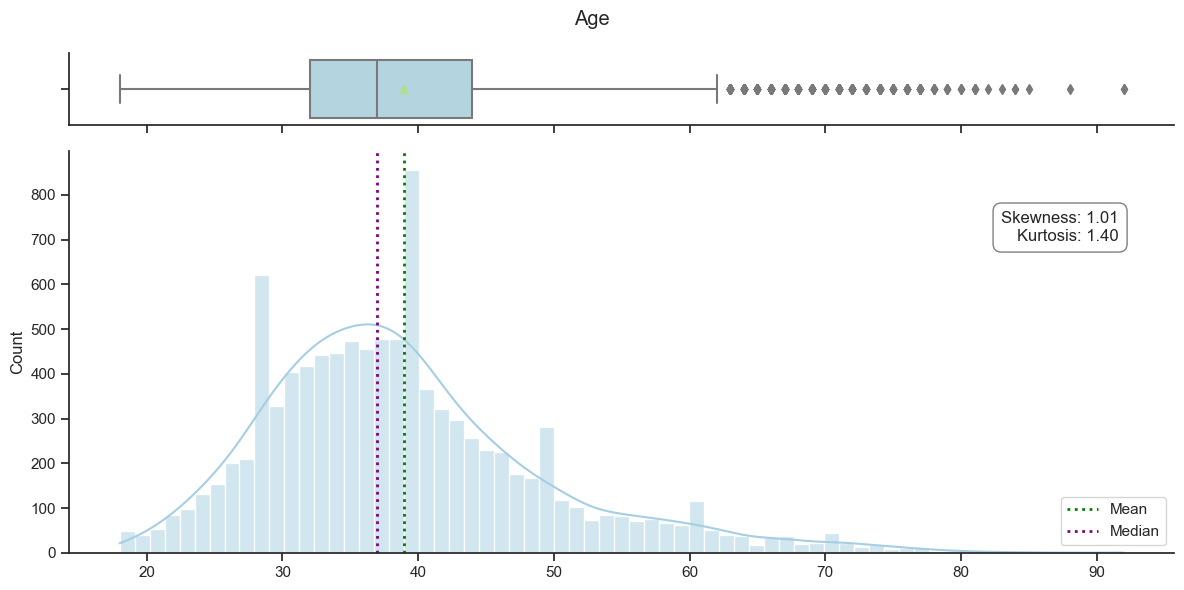

In [24]:
dist_plot(df, 'Age')

🔎 **Observations:** Approaches to the normal distribution with left skewed. We may consider the customers who are above 61 as outliers.

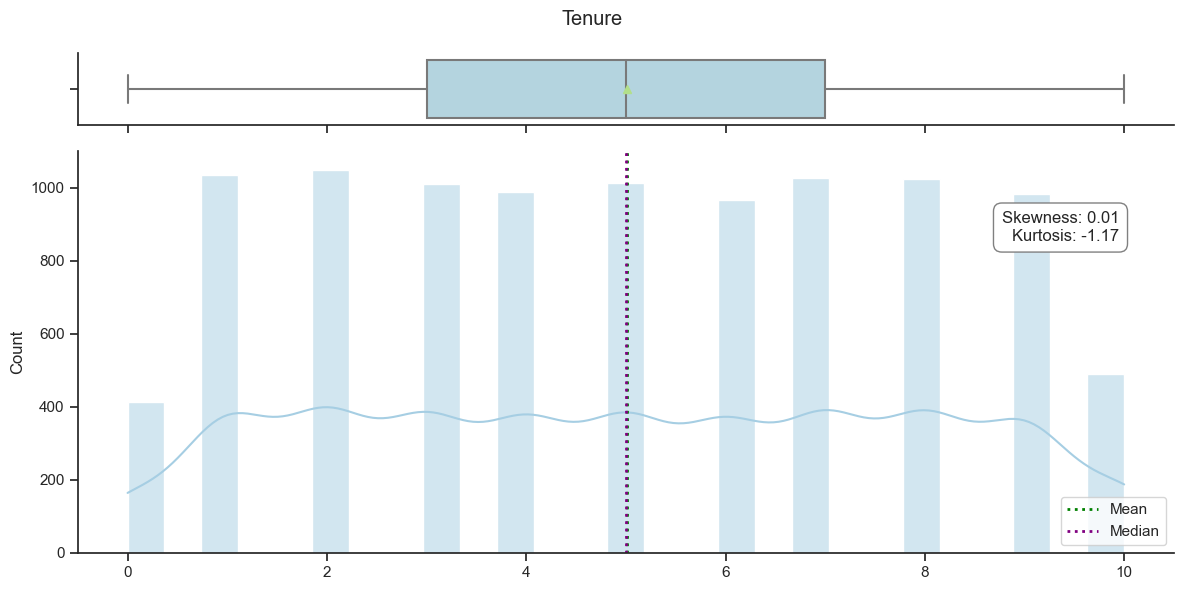

In [25]:
dist_plot(df, 'Tenure')

🔎 **Observations:** The feature has almots univarite distribution. It has only integer values with limited number of different values which makes it a good candidate to convert it into a categorical feature. However, we should be careful while encoding it.
It's better to investigate the relation of this feature with the target carefully.

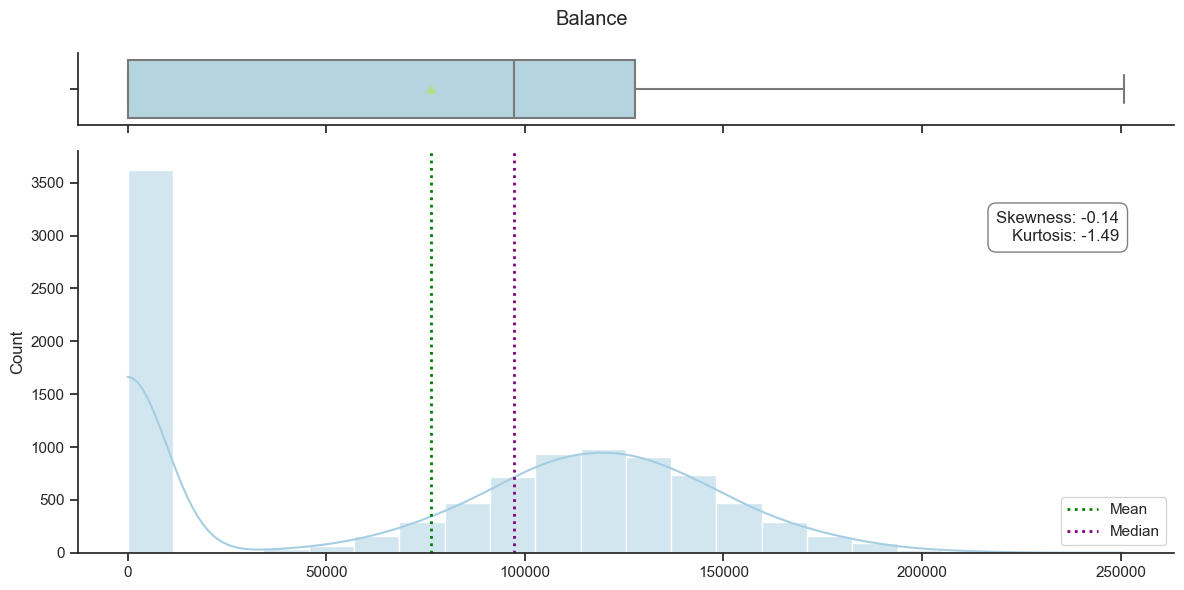

In [26]:
dist_plot(df, 'Balance')

🔎 **Observations:** It has a strange distribution. Majority of the customers has 0 balance which impacts the distribution. Let's check the distribution of the data without 0s firts then evaluate the data loss if we drop the records with 0 balance.

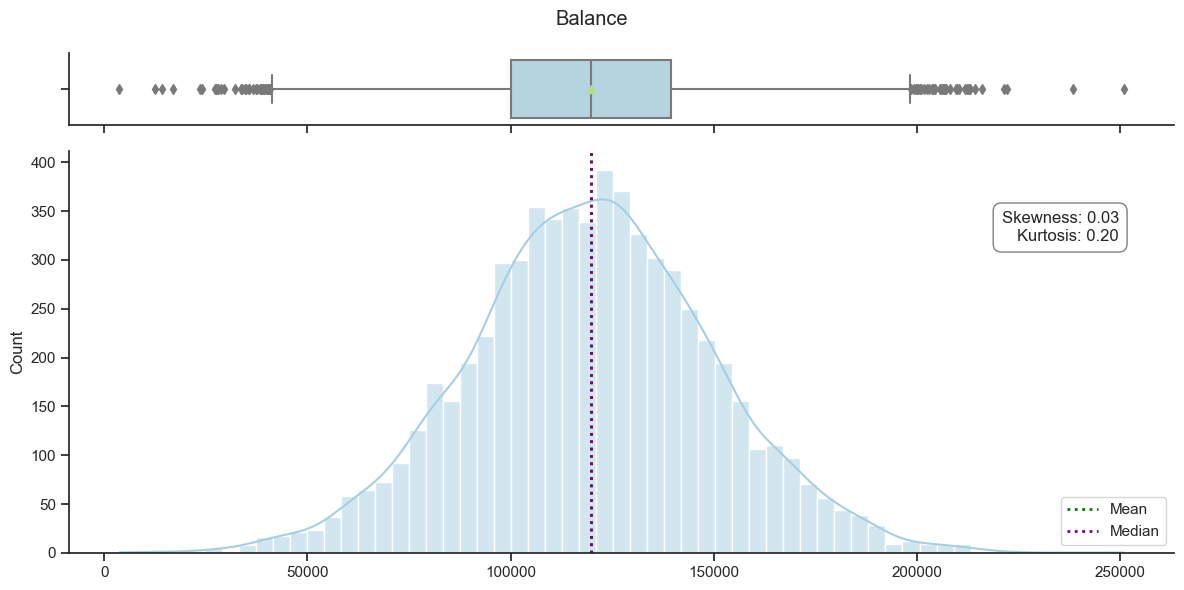

In [27]:
dist_plot(df[df['Balance'] != 0], 'Balance')

🔎 **Observations:** As you may see from the above plot, it has almost perfect normal distribution. Let's check thethe data loss if we drop the records with 0 balance in the Bivariate Analysis section.

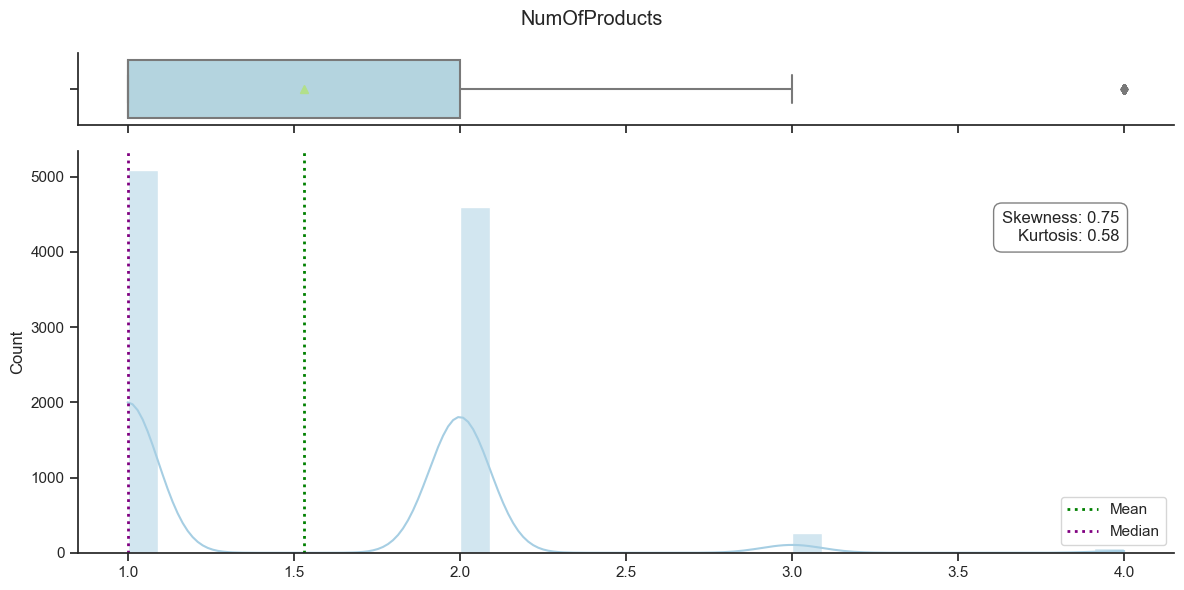

In [28]:
dist_plot(df, 'NumOfProducts')

🔎 **Observations:** Same as Tenure feature.

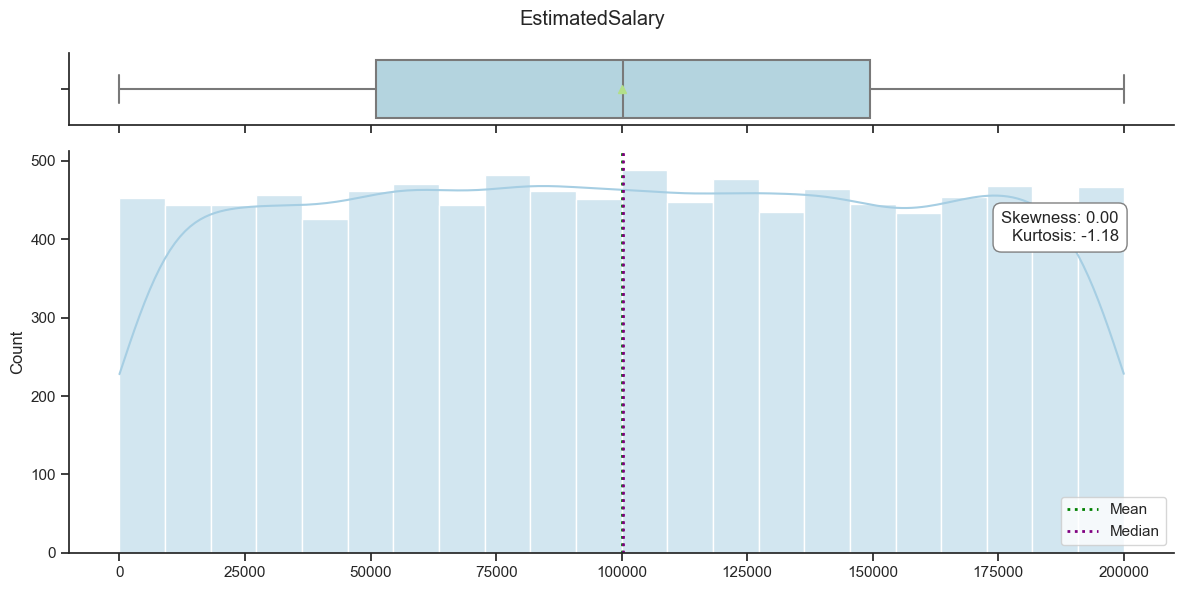

In [29]:
dist_plot(df, 'EstimatedSalary')

🔎 **Observations:** This feature has a univariate distribution.

## Bivariate Analysis
Let's evaluate the relation of the features with the target in this section.

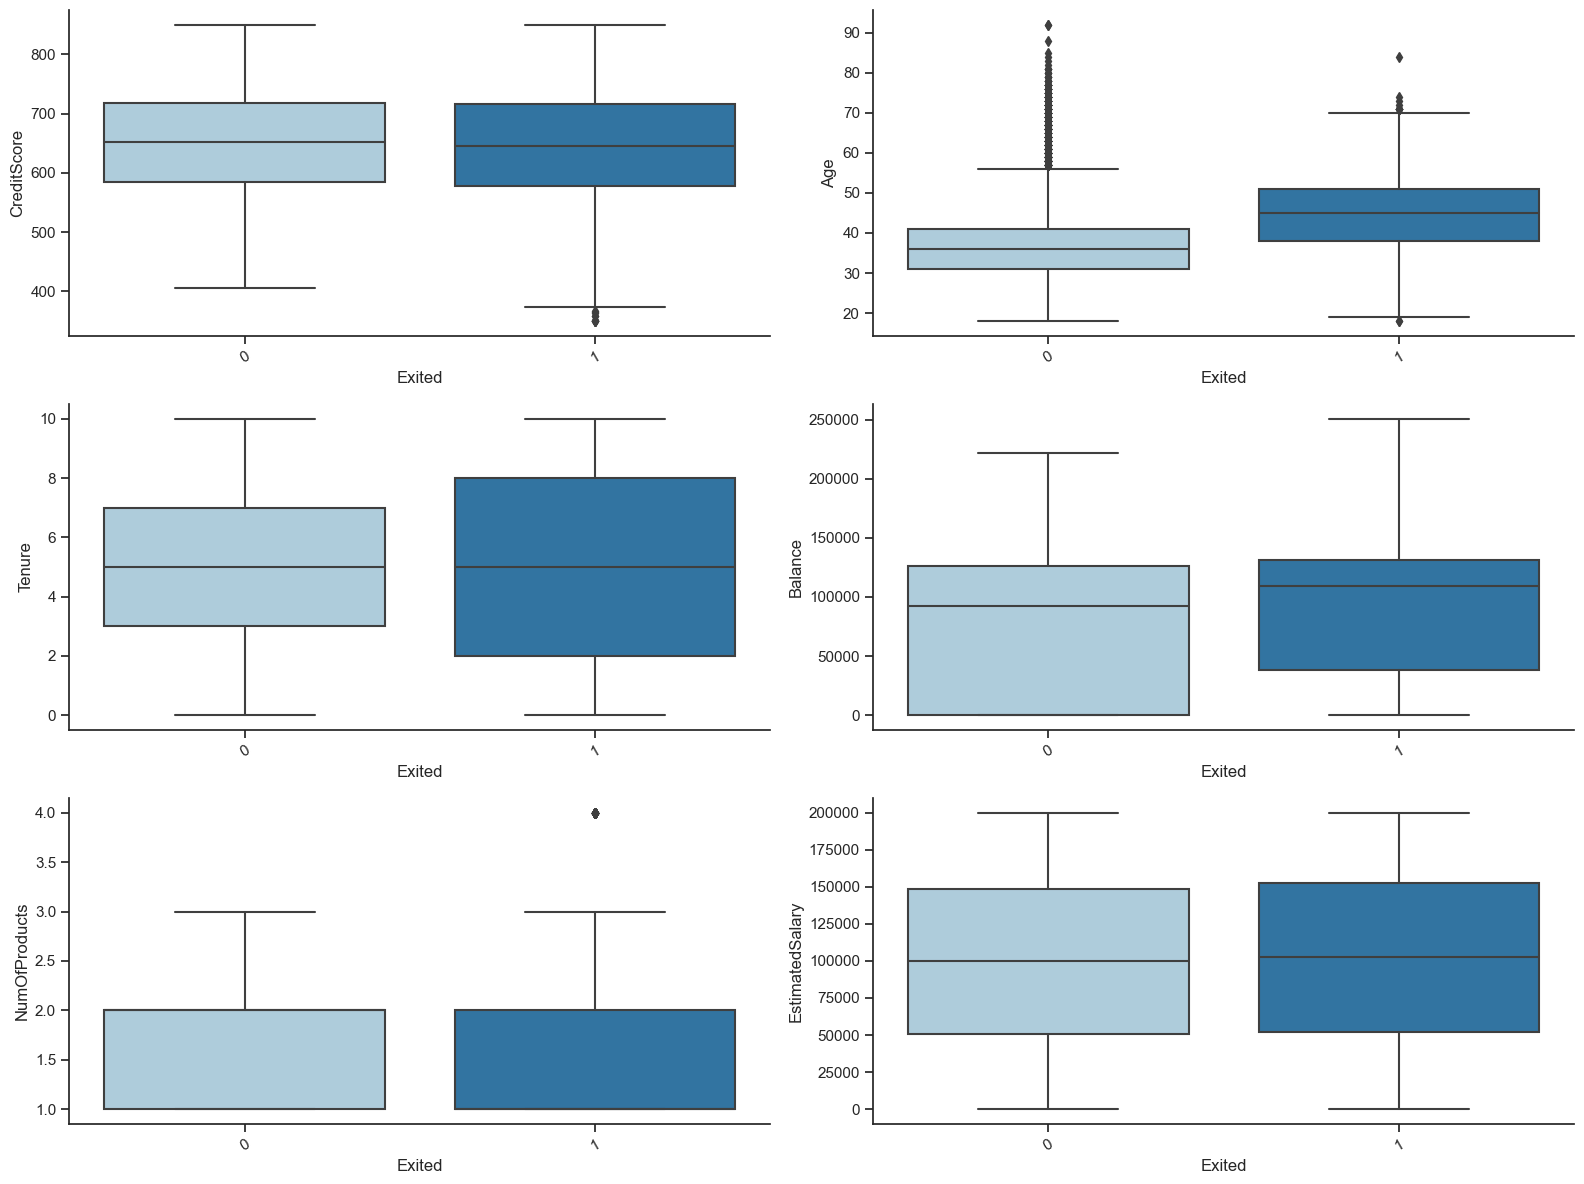

In [30]:
n_cols = 2 # set the number of columns
n_rows = int(np.ceil(len(num_cols)/n_cols)) # set the number of rows with the predefined number of columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows)) # width, height of the figure
    
for i, feature in enumerate(num_cols):
    row_idx = i // n_cols
    col_idx = i % n_cols
    sb.boxplot(data=df, x='Exited', y=feature, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].tick_params(axis='x', rotation=30)
        
# If the number of features is odd, remove the empty subplot
if len(num_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])
    
plt.tight_layout()
plt.show()

🔎 **Observations:** It's hard to come up with any of the numeric features with the target variable by just looking at the above plot. We only noticed that median Age of the customers who stopped getting service from the bank is older than the people who are still the customers of the bank.

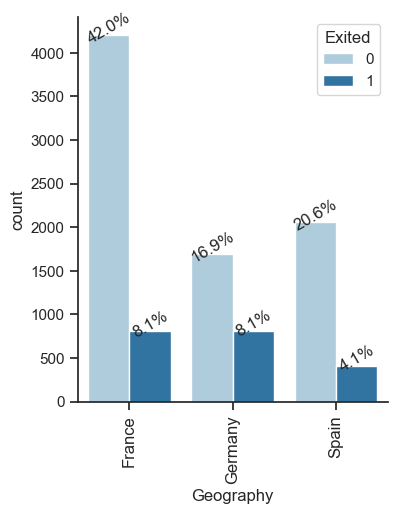

In [31]:
plot_counts(df, 'Geography', hue='Exited', perc=True)

🔎 **Observations:** German people are more tend to leave the bank.

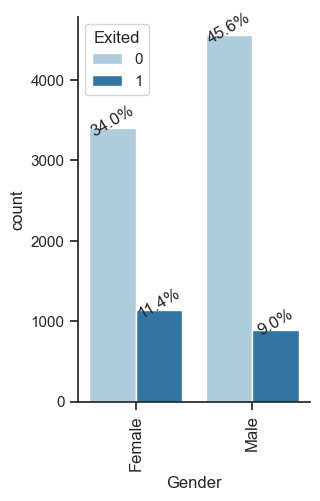

In [32]:
plot_counts(df, 'Gender', hue='Exited', perc=True)

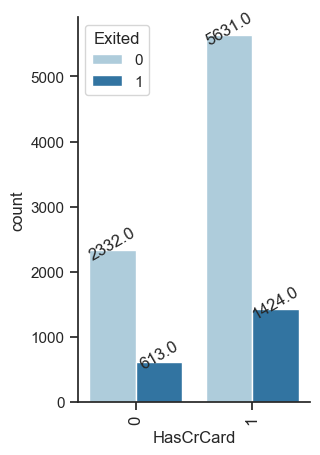

In [33]:
plot_counts(df, 'HasCrCard', hue='Exited')

🔎 **Observations:** 20% of the people who have credit card and who don't leaves the bank so we can't say there is a relation with the target.

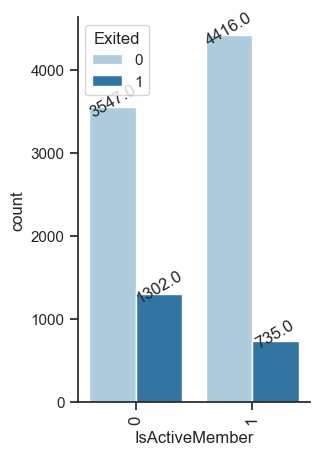

In [34]:
plot_counts(df, 'IsActiveMember', hue='Exited')

🔎 **Observations:** 27% of the non-active customers exited the bank. On the other hand 13% of the active customers exited. So we can safe to say that the 

## Multivariate Analysis

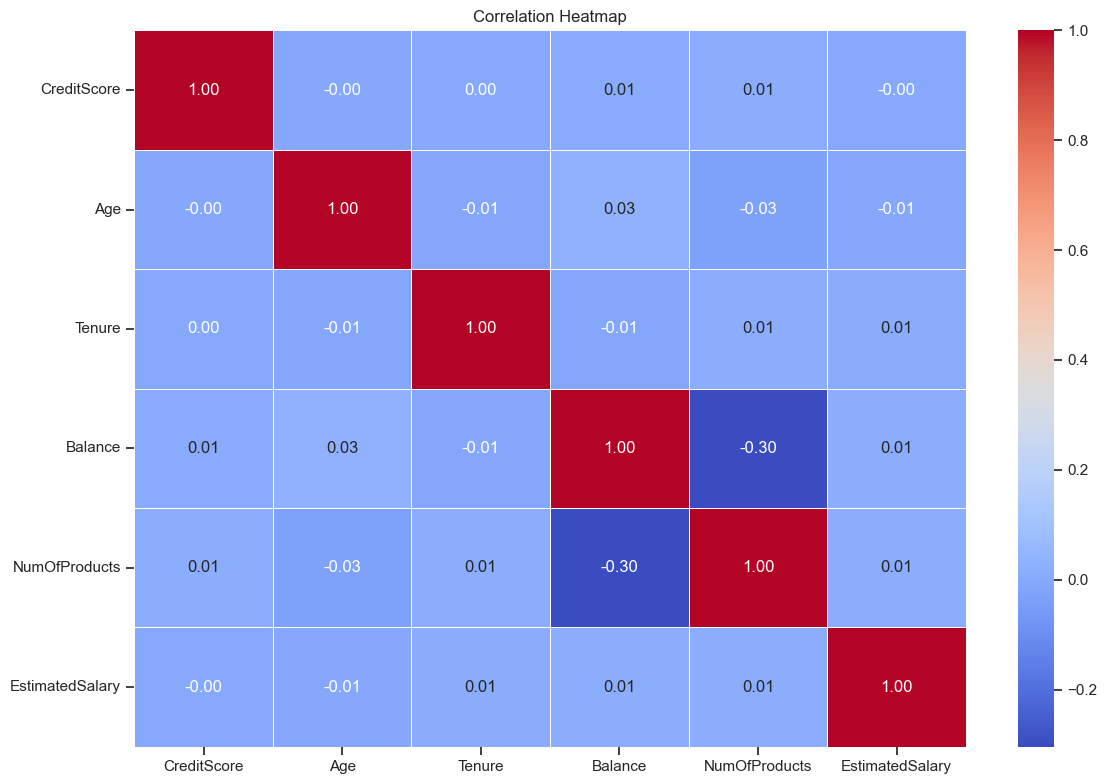

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))
sb.heatmap(df.drop(cat_cols, axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

🔎 **Observations:** It looks like there is a strong reverse correlation between Balance and the NumOfProducts. This must be taken into consideration while using linear algorithms.

# Preparing Data

In Data Overview section, we haven't detected any null/missing values in the dataset. The dataset doesn't have any duplicate records as well. There two points that requires further evaluation.
- Removing the outliers from the Age column
- Deciding on if we should remove the records with 0 balance

We'll create 2 different datasets. One will have the records with 0 balance and outliers in the Age feature and the other one won't have these records so we can compare the performance of the models.


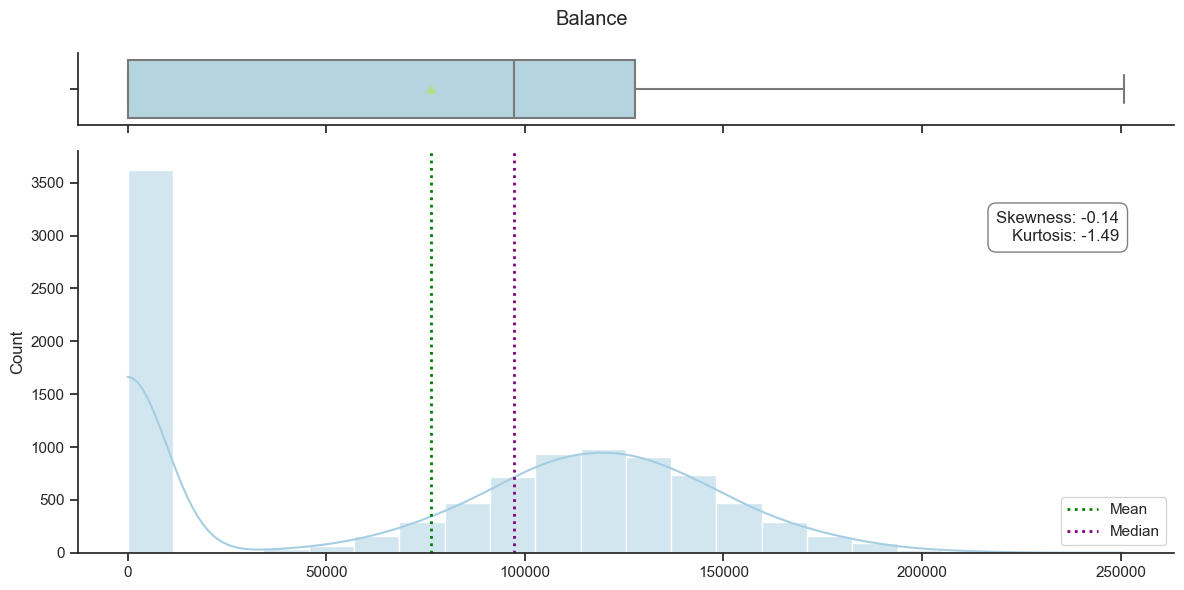

In [36]:
dist_plot(df, 'Balance')

In [37]:
len(df[df['Balance'] == 0])

3617

🔎 **Observations:** There are 3617 records with 0 balance out of 10000.

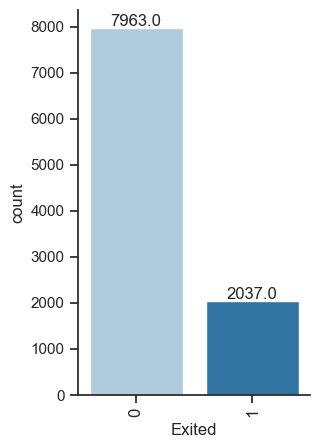

In [38]:
plot_counts(df, 'Exited')

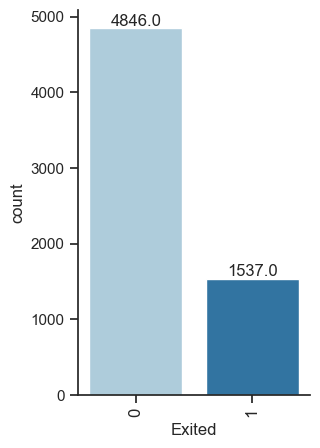

In [39]:
plot_counts(df[df['Balance'] != 0], 'Exited')

🔎 **Observations:** If remove the records with 0 balance we'd still have around 6000 records which might be enough to build a predictive model.

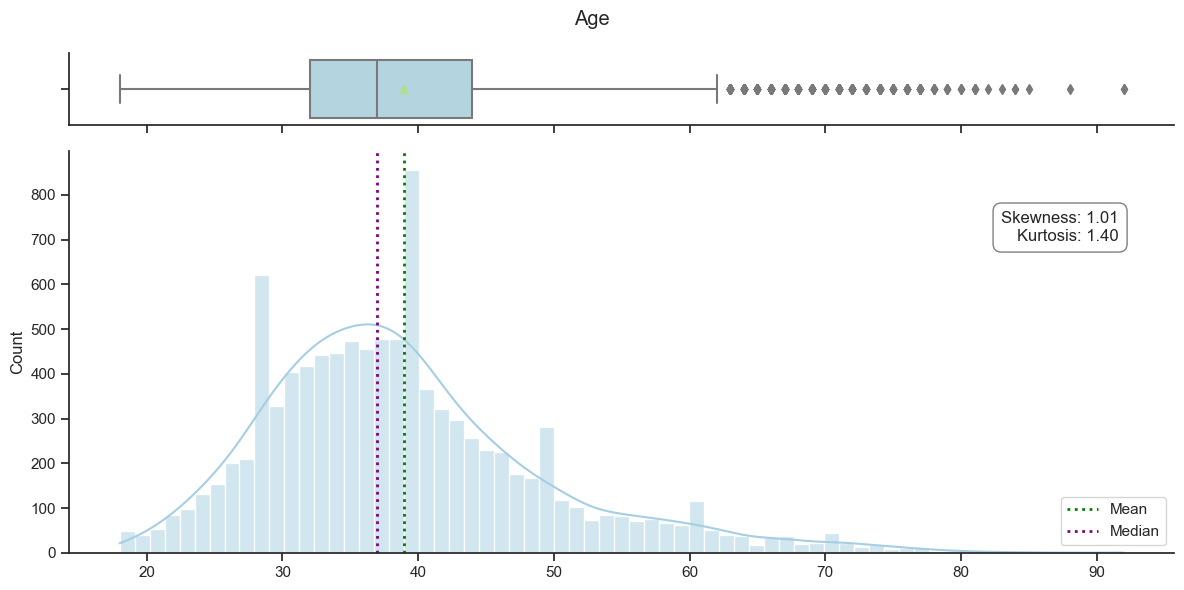

In [40]:
dist_plot(df, 'Age')

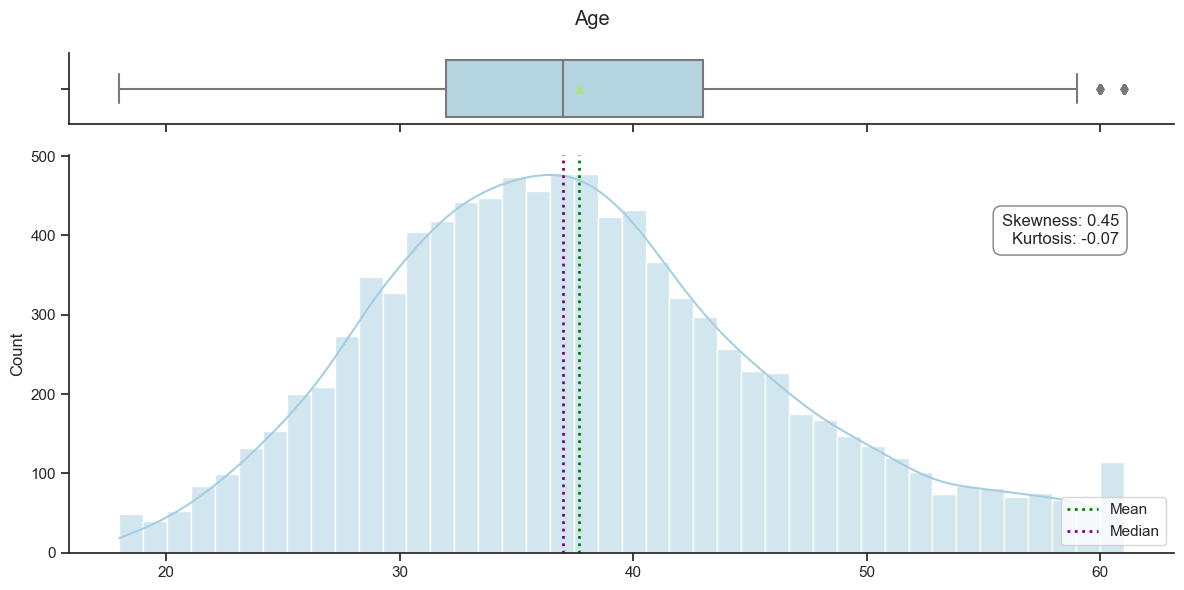

In [41]:
dist_plot(df[df['Age'] < 62], 'Age')

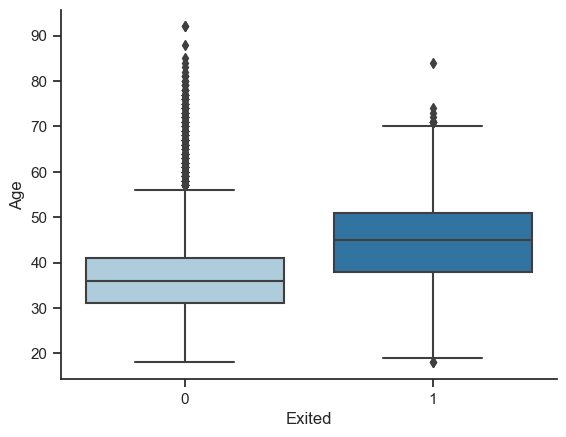

In [42]:
sb.boxplot(data=df, x='Exited', y='Age')
plt.show()

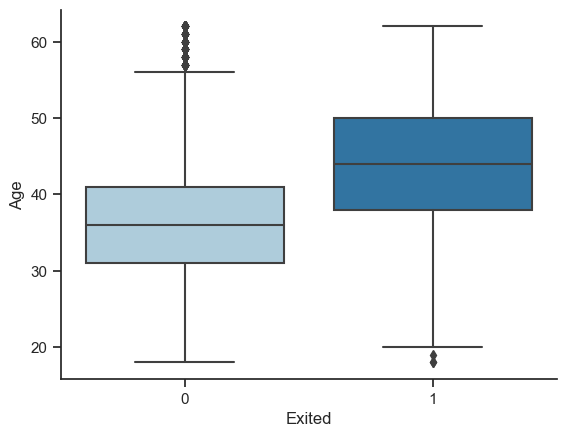

In [43]:
sb.boxplot(data=df[df['Age']<=62], x='Exited', y='Age')
plt.show()

In [44]:
len(df[df['Age'] < 62])

9589

In [45]:
df_clean = df[df['Age'] < 62]
df_clean = df[df['Balance'] != 0]
df_clean.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,6383.000,NaN,NaN,NaN,651.138,96.935,350.000,584.000,652.000,718.000,850.000
Geography,6383,3,France,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,6383,2,Male,3494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,6383.000,NaN,NaN,NaN,39.198,10.476,18.000,32.000,38.000,44.000,92.000
Tenure,6383.000,NaN,NaN,NaN,4.980,2.910,0.000,2.000,5.000,8.000,10.000
Balance,6383.000,NaN,NaN,NaN,119827.494,30095.056,3768.690,100181.975,119839.690,139512.290,250898.090
NumOfProducts,6383.000,NaN,NaN,NaN,1.386,0.577,1.000,1.000,1.000,2.000,4.000
HasCrCard,6383.000,2.000,1.000,4463.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsActiveMember,6383.000,2.000,1.000,3278.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EstimatedSalary,6383.000,NaN,NaN,NaN,100717.353,57380.317,11.580,51736.850,101139.300,149596.615,199970.740


In [46]:
df_clean.to_csv('../Data/Processed/clean.csv')

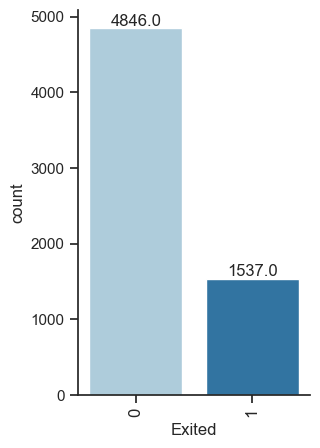

In [47]:
plot_counts(df_clean, 'Exited')

🔎 **Observations:** After removing the outliers and the records with 0 balance we have more than 6300 records and ratio of the exited customers to the customers are almost the same.

In [48]:
df_encoded = pd.get_dummies(data=df_clean, columns=['Geography', 'Gender'], drop_first=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6383 entries, 1 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6383 non-null   int64  
 1   Age                6383 non-null   int64  
 2   Tenure             6383 non-null   int64  
 3   Balance            6383 non-null   float64
 4   NumOfProducts      6383 non-null   int64  
 5   HasCrCard          6383 non-null   object 
 6   IsActiveMember     6383 non-null   object 
 7   EstimatedSalary    6383 non-null   float64
 8   Exited             6383 non-null   object 
 9   Geography_Germany  6383 non-null   uint8  
 10  Geography_Spain    6383 non-null   uint8  
 11  Gender_Male        6383 non-null   uint8  
dtypes: float64(2), int64(4), object(3), uint8(3)
memory usage: 517.4+ KB


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
x = df_encoded.drop(['Exited'], axis=1)
y = df_encoded['Exited'].astype('int')

# Split the dataset into train and test by keeping the ratio of Exited customers
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101, stratify=y)

## Scaling the Data

We'll use standard scaling

$X^`_i = \frac{X_i - \mu}{\sigma} = \frac{X_i - X_{mean}}{X_{std}}$

In [51]:
std_scaler = StandardScaler()
x_std = std_scaler.fit(x_train)
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

# Evaluating Different Algorithms

In this section we'll evaluate linear, non-linear and ensemble algorithms using k-fold cross validation.

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [53]:
def model_evaluation(x, y, models):
    '''
        This function takes x, y and models and applies 
        k-fold cross validation to the each algorithm in 
        the models list by using x and y training set. 
        Displays the mean and standard deviation of 
        accuracy, precision, recall, f1 scores in tabular
        format and boxplots.

        ---
        ### Parameters
        - x <array>: Feature values.
        - y <array>: Target values.
        - models <list>: List of the model objects to be vealuated.
    '''
    
    names = []
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    
    # Create a dataframe to store the different metric values for each algorithm
    df_results = pd.DataFrame(columns=['Algorithm', 'Acc Mean', 'Acc STD', 'Pre Mean', 'Pre STD', 
                                       'Rec Mean', 'Rec STD', 'F1 Mean', 'F1 STD'])
    results_acc = [] # List of accuracy scores for each fold of each algorithm
    results_pre = [] # List of precision scores for each fold of each algorithm
    results_rec = [] # List of recall scores for each fold of each algorithm
    results_f1 = []  # List of F1 scores for each fold of each algorithm
    
    for name, model in models:
        names.append(name)
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
        result = cross_validate(model, x, y, cv=kfold, scoring=scoring)
    
        # Mean and standard deviation of Accuracy scores for the algorithm
        acc_mean = result['test_accuracy'].mean()
        acc_std = result['test_accuracy'].std()

        # Mean and standard deviation of Precision scores for the algorithm
        pre_mean = result['test_precision'].mean()
        pre_std = result['test_precision'].std()

        # Mean and standard deviation of Recall scores for the algorithm
        rec_mean = result['test_recall'].mean()
        rec_std = result['test_recall'].std()

        #Mean and standard deviation of F1-Score scores for the algorithm
        f1_mean = result['test_f1'].mean()
        f1_std = result['test_f1'].std()
        
        # Create the row of the results
        df_result_row = {'Algorithm': name, 'Acc Mean': acc_mean, 'Acc STD': acc_std, 'Pre Mean': pre_mean, 
                         'Pre STD': pre_std, 'Rec Mean': rec_mean, 'Rec STD': rec_std, 'F1 Mean': f1_mean, 
                         'F1 STD': f1_std}
        # Add the row to the results data frame
        df_results = pd.concat([df_results, pd.DataFrame([df_result_row])], ignore_index=True)
        
        results_acc.append(result['test_accuracy'])
        results_pre.append(result['test_precision'])
        results_rec.append(result['test_recall'])
        results_f1.append(result['test_f1'])

    df_results = df_results.set_index('Algorithm')
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    # Display the mean and standard deviation of all metrics for all algorithms
    print(df_results)
    
    # Display the overall results in a boxplot graph
    plot_objects = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))
    fig, (ax1, ax2, ax3, ax4) = plot_objects
    
    ax1.boxplot(results_acc)
    ax1.set_title('Accuracy', fontsize=14)
    ax1.set_xticklabels(names, rotation=30)
    ax2.boxplot(results_pre)
    ax2.set_title('Precision', fontsize=14)
    ax2.set_xticklabels(names, rotation=30)
    ax3.boxplot(results_rec)
    ax3.set_title('Recall', fontsize=14)
    ax3.set_xticklabels(names, rotation=30)
    ax4.boxplot(results_f1)
    ax4.set_title('F1-Score', fontsize=14)
    ax4.set_xticklabels(names, rotation=30)
    plt.tight_layout()
    plt.show()

## Ensemble Mehtods

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
ens_models = []
ens_models.append(('RFC', RandomForestClassifier()))
ens_models.append(('ABC', AdaBoostClassifier()))
ens_models.append(('GBC', GradientBoostingClassifier()))

           Acc Mean  Acc STD  Pre Mean  Pre STD  Rec Mean  Rec STD  F1 Mean  \
Algorithm                                                                     
RFC           0.834    0.011     0.766    0.038     0.450    0.030    0.566   
ABC           0.822    0.010     0.711    0.047     0.446    0.038    0.547   
GBC           0.836    0.011     0.777    0.035     0.450    0.039    0.569   

           F1 STD  
Algorithm          
RFC         0.033  
ABC         0.030  
GBC         0.037  


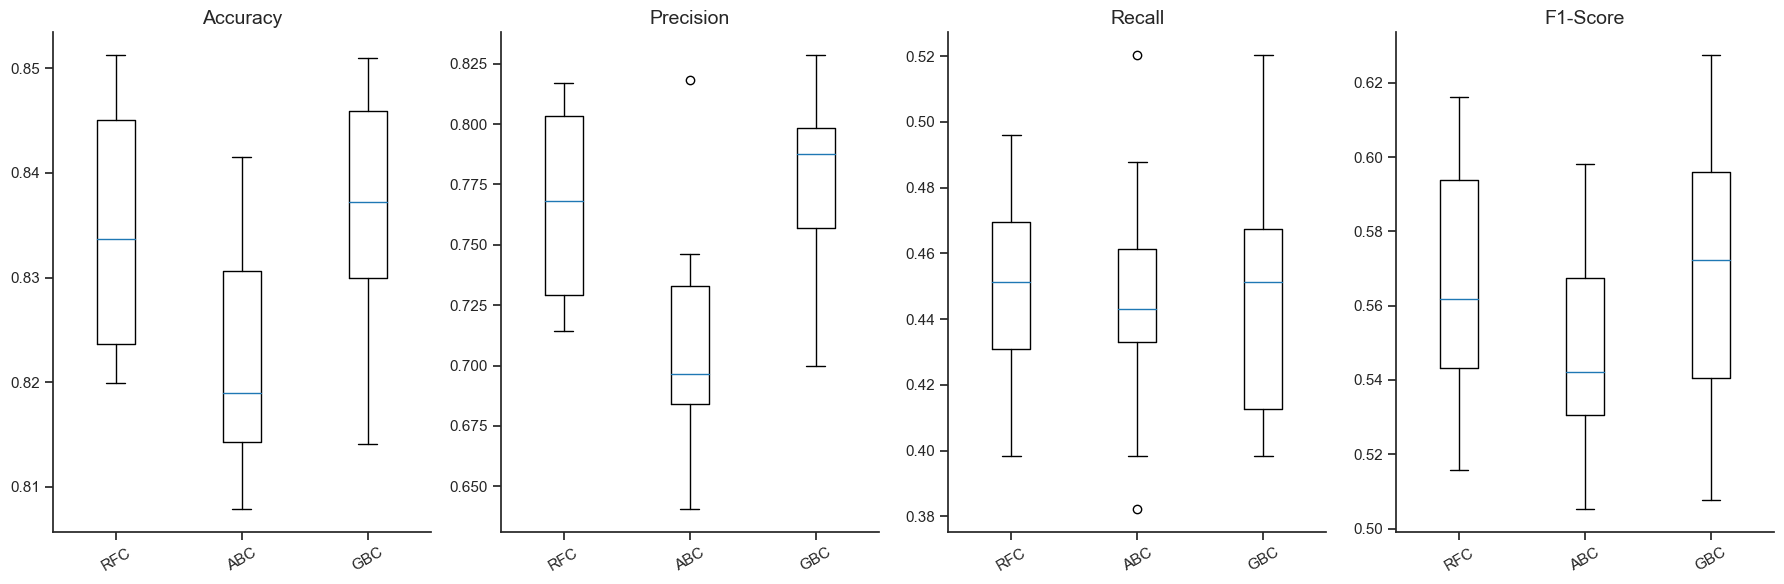

In [56]:
model_evaluation(x_train_std, y_train, ens_models)

🔎 **Observations:** As we suggested in the above section, we should focus on **maximizing the Recall** for this problem even though we have prety decent Accuracy scores which might be deceiving. When we check the mean recall scores for each algorithm, we can see that `GradientBoostingClassifier` has the highest value. However this is not sufficient to consider this model as a successful one. 

Let's check non-linear methods in the next section.

## Non-linear Methods

In [57]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

           Acc Mean  Acc STD  Pre Mean  Pre STD  Rec Mean  Rec STD  F1 Mean  \
Algorithm                                                                     
SVC           0.834    0.011     0.825    0.055     0.396    0.030    0.534   
DTC           0.745    0.012     0.472    0.024     0.500    0.039    0.485   
KNN           0.798    0.016     0.638    0.057     0.376    0.045    0.472   
GNB           0.790    0.017     0.645    0.087     0.290    0.039    0.400   

           F1 STD  
Algorithm          
SVC         0.033  
DTC         0.028  
KNN         0.047  
GNB         0.050  


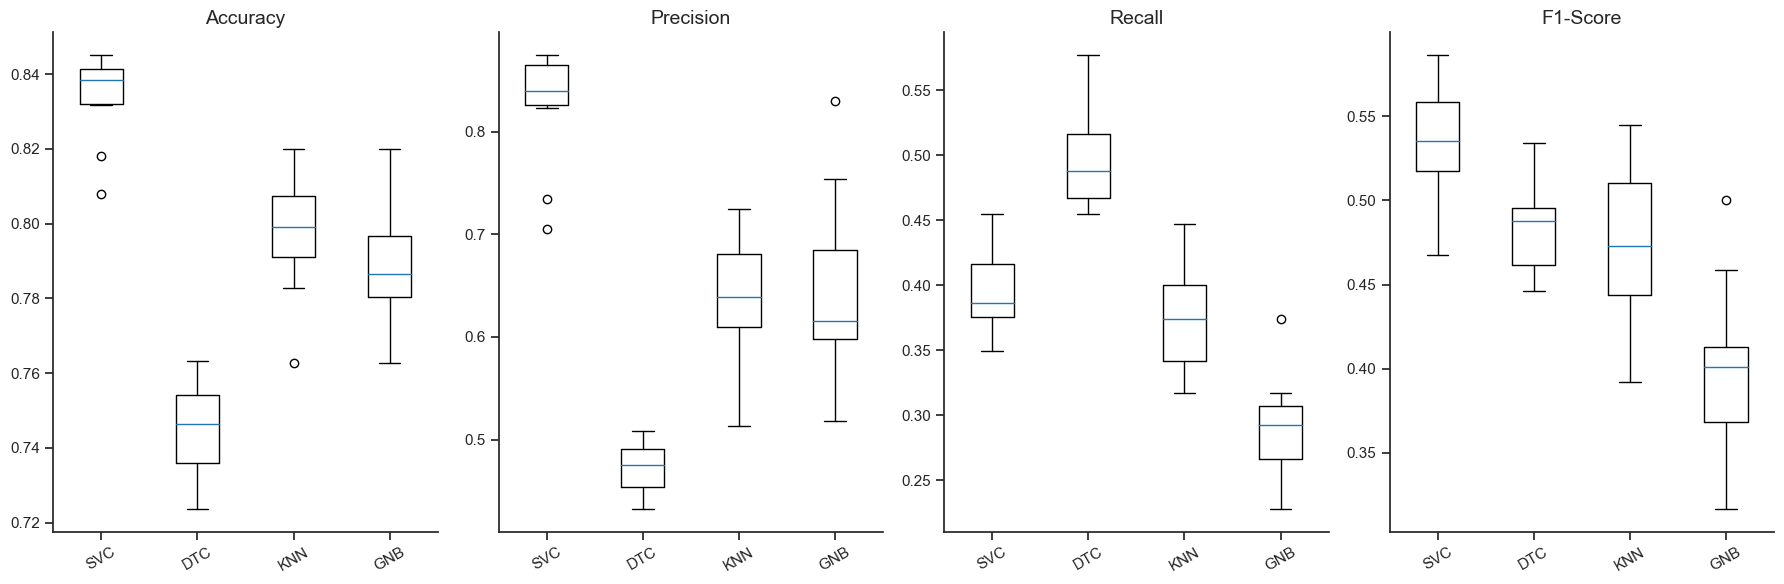

In [58]:
nl_models = []
nl_models.append(('SVC', SVC()))
nl_models.append(('DTC', DecisionTreeClassifier()))
nl_models.append(('KNN', KNeighborsClassifier()))
nl_models.append(('GNB', GaussianNB()))

model_evaluation(x_train_std, y_train, nl_models)

🔎 **Observations:** As you can see on the above graph the `DecisionTreeClassifier` does a better job here. However, the score is still not sufficient.

Before moving further with linear methods and deal with it's assumptions, let's check the performance of non-linear and ensemble methods using a balanced dataset. We'll apply `RandomUnderSampler` with 0.9 `sampling_strategy` assuming we'd have enough datapoints for the generilization ability of the algorithms. With this approach, we'd be able to focus on Accuracy as well.

## Under Sampling

In [59]:
# Randomly delete examples in the majority class using RandomUnderSampler package.
from imblearn.under_sampling import RandomUnderSampler

In [60]:
# Number of the items in the minority class will as 90% as much of the majority class
undersample = RandomUnderSampler(sampling_strategy=0.9) 

x_under, y_under = undersample.fit_resample(x_train_std, y_train)
print('x under sampled shape: ', x_under.shape)
print('y under sampled shape: ', y_under.shape)


x under sampled shape:  (2596, 11)
y under sampled shape:  (2596,)


In [61]:
y_under.value_counts()

0    1366
1    1230
Name: Exited, dtype: int64

🔎 **Observations:** The number of records for each class are very close to each other and we may consider the dataset is balanced.

           Acc Mean  Acc STD  Pre Mean  Pre STD  Rec Mean  Rec STD  F1 Mean  \
Algorithm                                                                     
RFC           0.745    0.018     0.755    0.025     0.684    0.040    0.717   
ABC           0.731    0.031     0.736    0.036     0.677    0.053    0.704   
GBC           0.752    0.021     0.775    0.028     0.673    0.036    0.720   

           F1 STD  
Algorithm          
RFC         0.024  
ABC         0.037  
GBC         0.025  


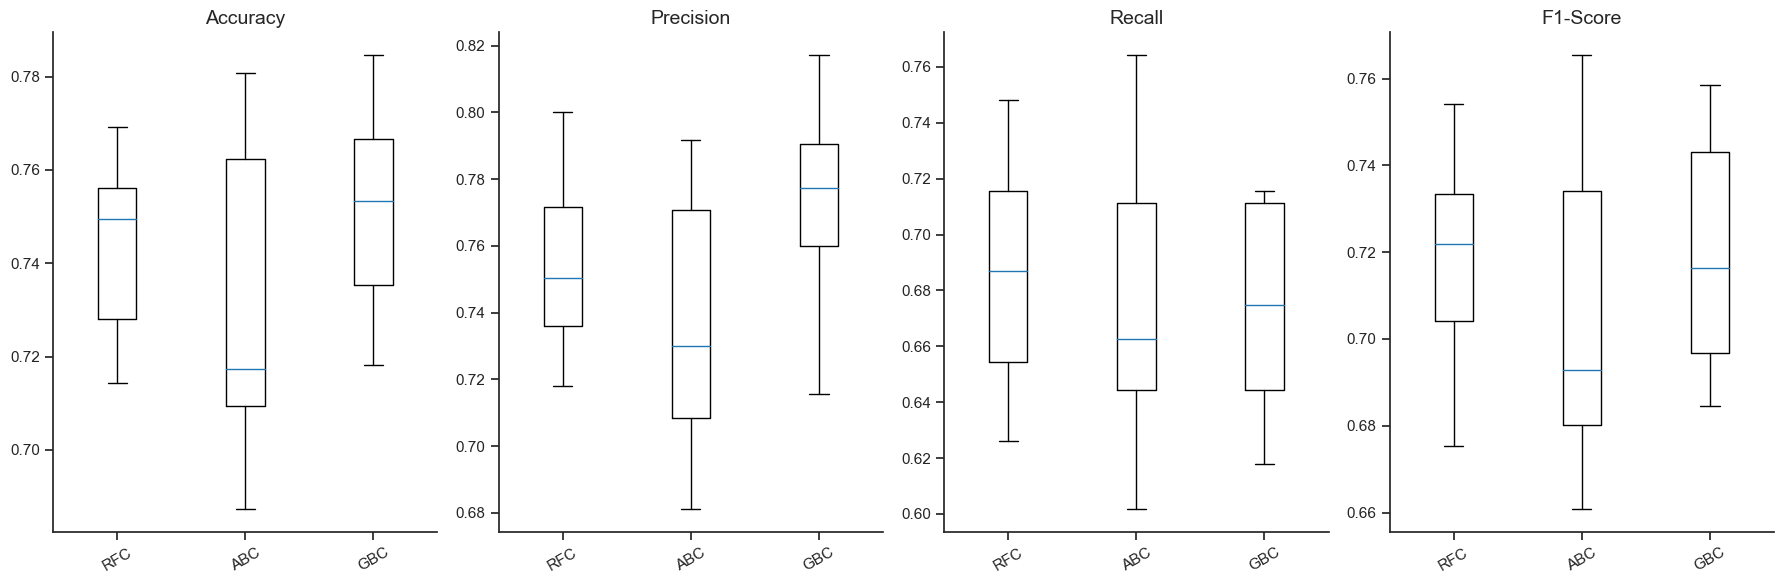

In [62]:
model_evaluation(x_under, y_under, ens_models)

🔎 **Observations:** We can see that `GradientBoostingClassifier` has the highest Accuracy score. Let's check the other methods to see if we can overcome this score.


           Acc Mean  Acc STD  Pre Mean  Pre STD  Rec Mean  Rec STD  F1 Mean  \
Algorithm                                                                     
SVC           0.752    0.019     0.770    0.025     0.680    0.032    0.722   
DTC           0.658    0.020     0.638    0.023     0.642    0.038    0.640   
KNN           0.711    0.033     0.714    0.038     0.654    0.057    0.682   
GNB           0.684    0.025     0.695    0.031     0.598    0.039    0.642   

           F1 STD  
Algorithm          
SVC         0.022  
DTC         0.024  
KNN         0.042  
GNB         0.030  


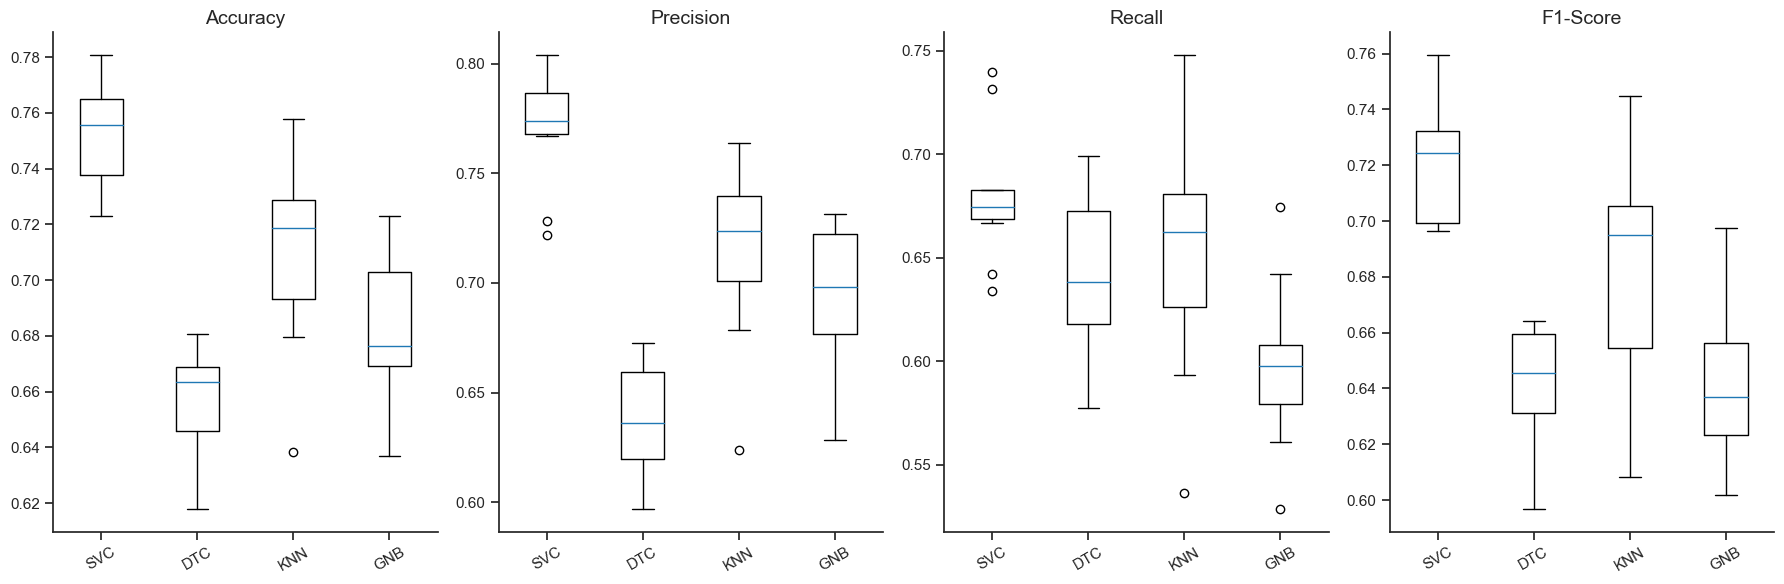

In [63]:
model_evaluation(x_under, y_under, nl_models)

🔎 **Observations:** As we can see in the above plot, `SupportVectorClassifier` has the highest Accuracy score. However it couldn't overcome the `GradiendBoostingClassifier`.

Before moving forward to the finalizing the model, let's check the linear algorithms.


## Linear Mehtods

### Check for Multicolinearity

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data. Features having a VIF score > 5 will be dropped/treated till all the features have a VIF score < 5. The VIF for dummy variables can be ignored which is expected that they would have a high VIF. We don't expect this case we dropped the one of the dummy variables to prevent this result.

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
vif_series = pd.Series(
    [variance_inflation_factor(x_under, i) for i in range(x_under.shape[1])],
    index = x.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

CreditScore         1.003
Age                 1.009
Tenure              1.005
Balance             1.002
NumOfProducts       1.024
HasCrCard           1.005
IsActiveMember      1.011
EstimatedSalary     1.005
Geography_Germany   1.245
Geography_Spain     1.217
Gender_Male         1.010
dtype: float64



🔎 **Observations:** No feature should be dropped.

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

           Acc Mean  Acc STD  Pre Mean  Pre STD  Rec Mean  Rec STD  F1 Mean  \
Algorithm                                                                     
LNR           0.694    0.019     0.688    0.024     0.650    0.034    0.668   
LDA           0.693    0.019     0.689    0.026     0.645    0.032    0.665   

           F1 STD  
Algorithm          
LNR         0.022  
LDA         0.020  


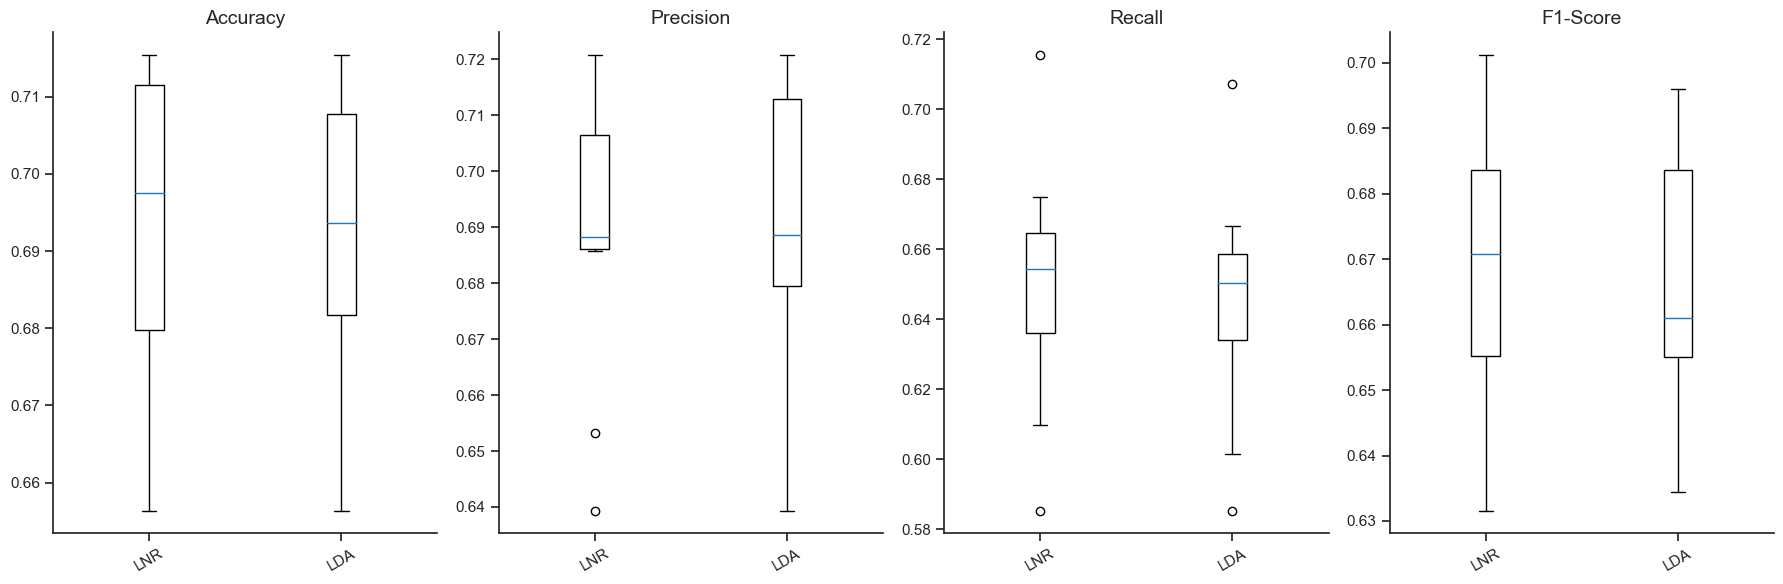

In [67]:
ln_models = []
ln_models.append(('LNR', LogisticRegression()))
ln_models.append(('LDA', LinearDiscriminantAnalysis()))
model_evaluation(x_under, y_under, ln_models)

🔎 **Observations:** The accuracy score are really low when you compare it to non-linear or ensemble methods.

### Checking for the assumptions and rebuilding the model
In this step, we will check whether the below assumptions hold true or not for the model. In case there is an issue, we will rebuild the model after fixing those issues.

- Mean of residuals should be 0
- Normality of error terms
- Linearity of variables
- No heteroscedasticity

To make the check easier we'll build the linear model using the `OLS` method of statsmodels `API`.

In [68]:
# Importing libraries for building linear regression model
import statsmodels.api as sm

In [69]:
# Adding the intercept term
x_under = sm.add_constant(x_under)

ols_model_0 = sm.OLS(y_under, x_under)

# Fitting the Model
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     60.91
Date:                Thu, 01 Feb 2024   Prob (F-statistic):          7.02e-121
Time:                        20:17:58   Log-Likelihood:                -1581.3
No. Observations:                2596   AIC:                             3187.
Df Residuals:                    2584   BIC:                             3257.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4282      0.009     47.891      0.0

In [70]:
# Residuals
residual = ols_res_0.resid
print('Mean of residuals: ', residual.mean())

Mean of residuals:  3.06551565505128e-16


🔎 **Observations:** The value is very close to the 0 which satisfies the first assumption.

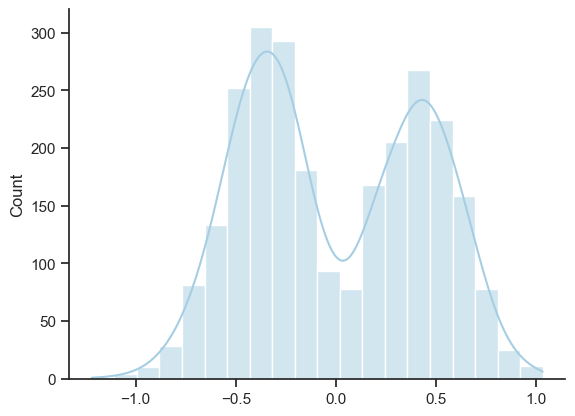

In [71]:
# Plot histogram of residuals
sb.histplot(residual, kde=True)
plt.show()

🔎 **Observations:** We can see that the error terms **are not** normally distributed. The assumption of normality **is not** satisfied.

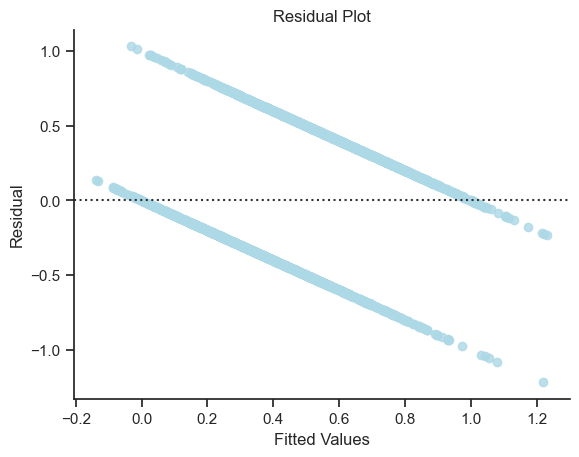

In [72]:
# Predicted values
fitted = ols_res_0.fittedvalues

sb.residplot(x=fitted, y=residual, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

🔎 **Observations:** There is an obvious pattern in the residual vs fitted values plot. Hence, the corresponding assumption **is not** satisfied.

In [73]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [74]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_under, x_under)
lzip(name, test)

/opt/anaconda3/envs/cloneTF2/lib/python3.10/site-packages/statsmodels/stats/diagnostic.py:958: RuntimeWarning: divide by zero encountered in double_scalars
  fval = resols2.mse_resid / resols1.mse_resid


[('F statistic', inf), ('p-value', 0.0)]

🔎 **Observartion:** We used `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

- **Null hypothesis:** Residuals are homoscedastic
- **Alternate hypothesis:** Residuals have heteroscedastic

Since p-value < 0.05, we can reject the Null Hypothesis that the residuals are homoscedastic and the corresponding assumption **is not** satisfied.

I personally prefer to leave the linear methods at this point and continue on the finalizing the model which performed best in the previous section.

## Model Finalizing

### Hyper Parameter Tuning

In this section we'll tune the hyperparameters of `GradientBoostingClassifier` function.

In [75]:
# Removing the constant (the intercept term) which was added during OLS 
x_under = np.delete(x_under, 0, axis=1)
x_under.shape

(2596, 11)

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
GBC = GradientBoostingClassifier()

crossvalidation = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

h_params = {
    'learning_rate':[0.15, 0.1, 0.05, 0.01], 
    'n_estimators':[100, 250, 500, 1000, 1500]
}
grid = GridSearchCV(
    estimator = GBC,
    param_grid = h_params,
    scoring = 'accuracy', 
    n_jobs = -1,
    cv = crossvalidation)

grid.fit(x_under, y_under)

# Print the best score and the hyper parameters that provides that score
grid.best_params_, grid.best_score_

({'learning_rate': 0.15, 'n_estimators': 100}, 0.7561723729064769)

In [78]:
model = GradientBoostingClassifier(**grid.best_params_)
model.fit(x_under, y_under)

GradientBoostingClassifier(learning_rate=0.15)

In [79]:
y_hat = model.predict(x_test)

/opt/anaconda3/envs/cloneTF2/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [80]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

In [81]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       970
           1       0.17      0.06      0.09       307

    accuracy                           0.70      1277
   macro avg       0.46      0.48      0.46      1277
weighted avg       0.61      0.70      0.64      1277



In [82]:
def plot_confusion_matrix(y_test, predictions):
    # Plot the confusion matrix
    cf_matrix = confusion_matrix(y_test, predictions)
    fig = plt.subplots(figsize=(10, 8))
    sb.set(font_scale=1.6)
    sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.1%')
    plt.xlabel('Predicted Label', fontsize=14)
    plt.xticks(fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

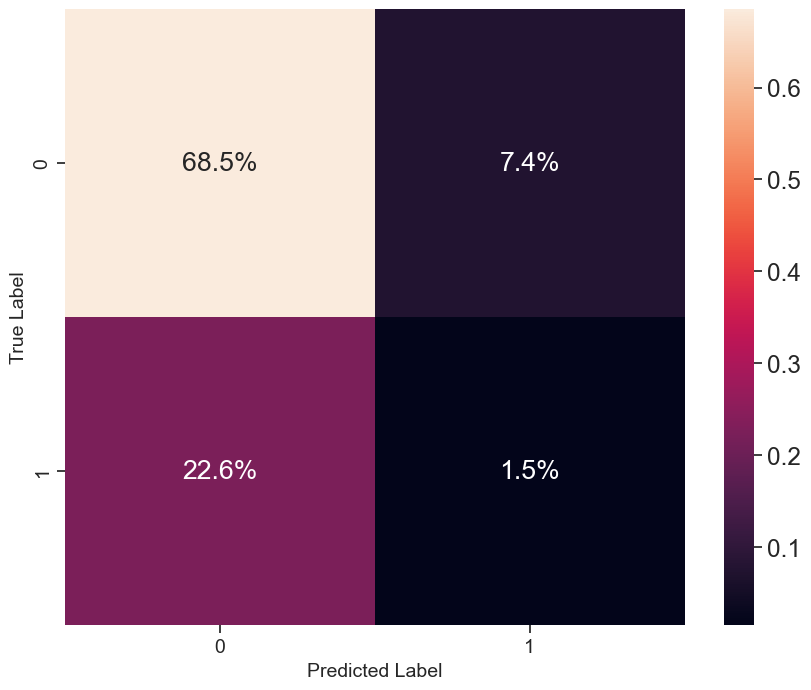

In [83]:
plot_confusion_matrix(y_test, y_hat)

In [84]:
def plot_roc_curve(y_test, predictions, estimator):
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=estimator)
    display.plot()
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.show()

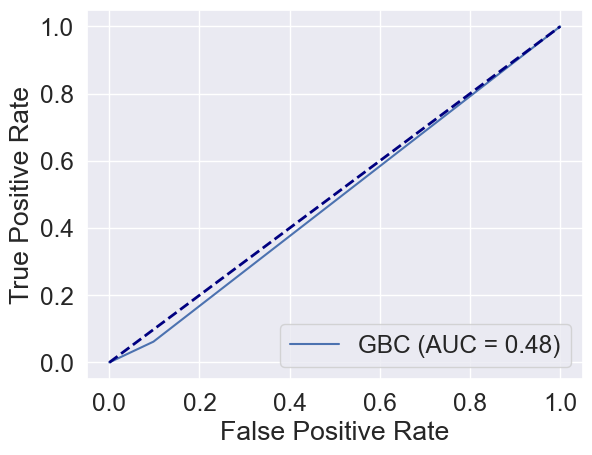

In [85]:
plot_roc_curve(y_test, y_hat, 'GBC')

🔎 **Observations:** We achieved 75% accuracy score with the proposed model. That's a good achievement. However, we can see on the confusion matrix that more than 20% of the predictions are false negatives which makes the model unrelaible.

Let's add more data to the dataset to enhance the generilization ability of the algorithms. We'll use the dataset which was not cleaned as mentioned in the data processing section.

## Full Dataset

In [86]:
df_full_encoded = pd.get_dummies(data=df, columns=['Geography', 'Gender'], drop_first=True)
df_full_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  object 
 6   IsActiveMember     10000 non-null  object 
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  object 
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(4), object(3), uint8(3)
memory usage: 732.5+ KB


In [87]:
x = df_full_encoded.drop(['Exited'], axis=1)
y = df_full_encoded['Exited'].astype('int')

# Split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101, stratify=y)

# Scale the dataset
std_scaler = StandardScaler()
x_std = std_scaler.fit(x_train)
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

# Number of the items in the minority class will as 90% as much of the majority class
undersample = RandomUnderSampler(sampling_strategy=0.9) 
x_under, y_under = undersample.fit_resample(x_train_std, y_train)
print('x under sampled shape: ', x_under.shape)
print('y under sampled shape: ', y_under.shape)

x under sampled shape:  (3441, 11)
y under sampled shape:  (3441,)


           Acc Mean  Acc STD  Pre Mean  Pre STD  Rec Mean  Rec STD  F1 Mean  \
Algorithm                                                                     
RFC           0.780    0.016     0.789    0.027     0.732    0.039    0.759   
ABC           0.777    0.014     0.781    0.026     0.738    0.031    0.758   
GBC           0.786    0.019     0.793    0.028     0.744    0.026    0.767   

           F1 STD  
Algorithm          
RFC         0.020  
ABC         0.015  
GBC         0.020  


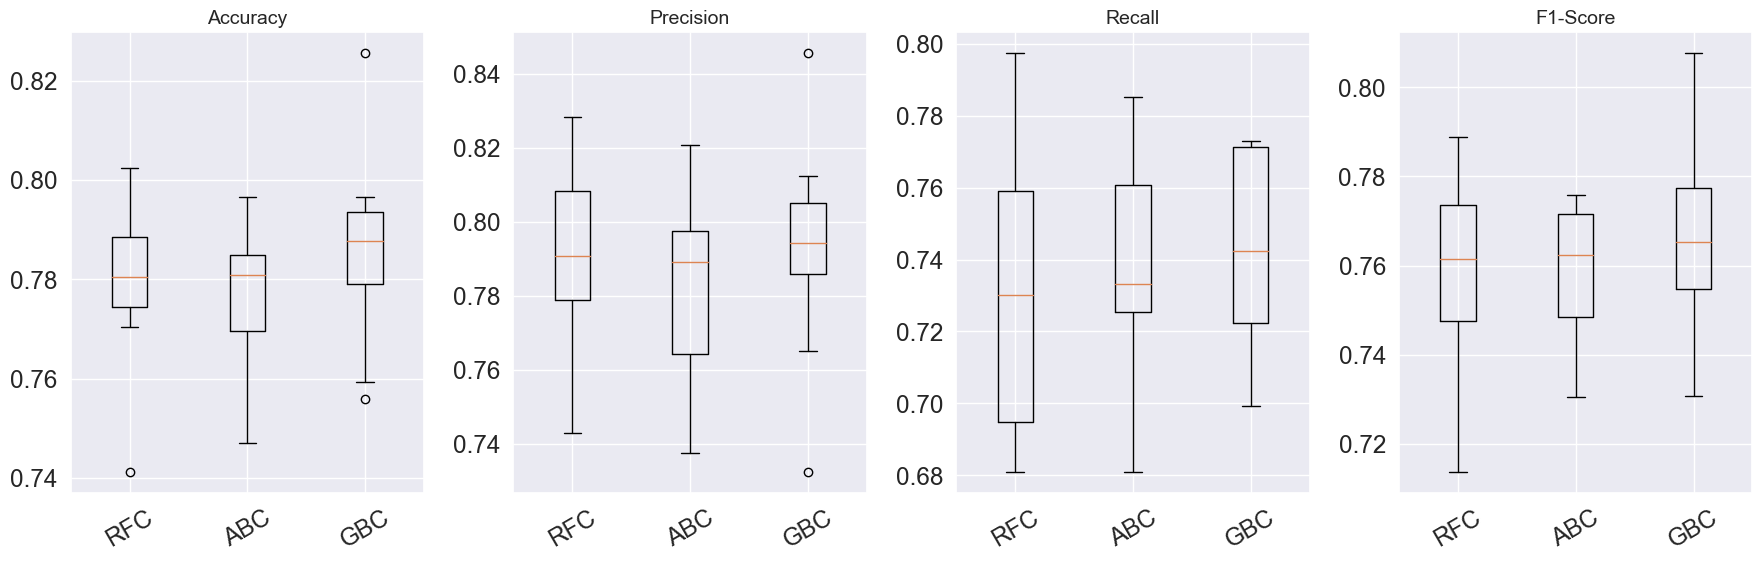

In [88]:
model_evaluation(x_under, y_under, ens_models)

🔎 **Observations:** Now we can see that the accuracy score increased. But this time `RandomForestClassifier` gave the best score. Let's also check the non-linear methods.

           Acc Mean  Acc STD  Pre Mean  Pre STD  Rec Mean  Rec STD  F1 Mean  \
Algorithm                                                                     
SVC           0.778    0.019     0.790    0.025     0.725    0.039    0.756   
DTC           0.714    0.017     0.697    0.026     0.706    0.040    0.700   
KNN           0.736    0.013     0.740    0.016     0.683    0.032    0.710   
GNB           0.717    0.022     0.716    0.032     0.669    0.033    0.691   

           F1 STD  
Algorithm          
SVC         0.023  
DTC         0.020  
KNN         0.019  
GNB         0.023  


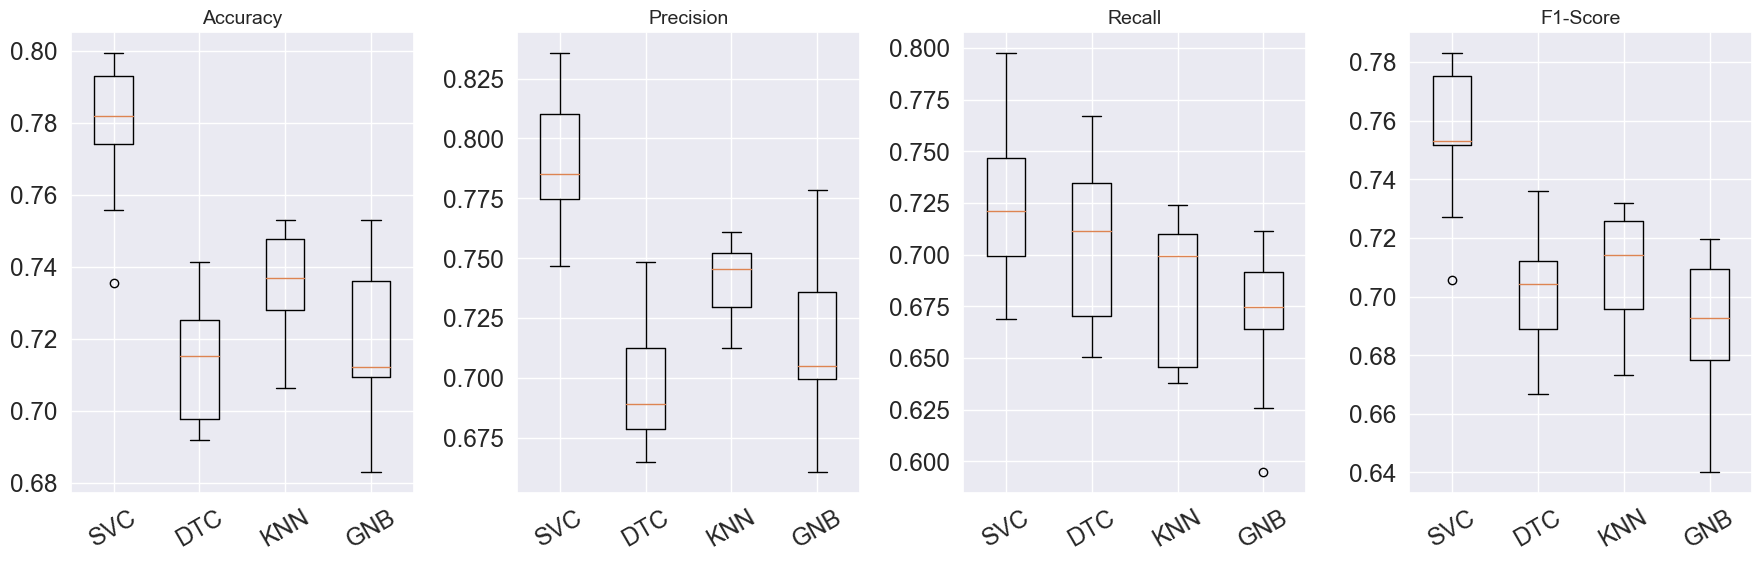

In [89]:
model_evaluation(x_under, y_under, nl_models)

🔎 **Observations:** `SupportVectorClassifier` is slightly better than `RandomForestClassifier`. Let's apply the hyperparameter tuning to `RFC` first, then `SVC`. *That's just an arbitrary decision.*

In [90]:
RFC = RandomForestClassifier()

crossvalidation = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

h_params = {
    'max_depth': [10, 50, 100],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [400, 1000, 2000]
    }

grid = GridSearchCV(
    estimator = RFC,
    param_grid = h_params,
    scoring = 'accuracy', 
    n_jobs = -1,
    cv = crossvalidation
    )

grid.fit(x_under, y_under)

# Print the best score and the hyper parameters that provides that score
grid.best_params_, grid.best_score_

({'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'n_estimators': 1000},
 0.7866882404563404)

In [91]:
model = RandomForestClassifier(**grid.best_params_)
model.fit(x_under, y_under)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=1000)

In [92]:
y_hat = model.predict(x_test_std)

In [93]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.92      0.84      0.87      1593
           1       0.52      0.70      0.60       407

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.81      0.82      2000



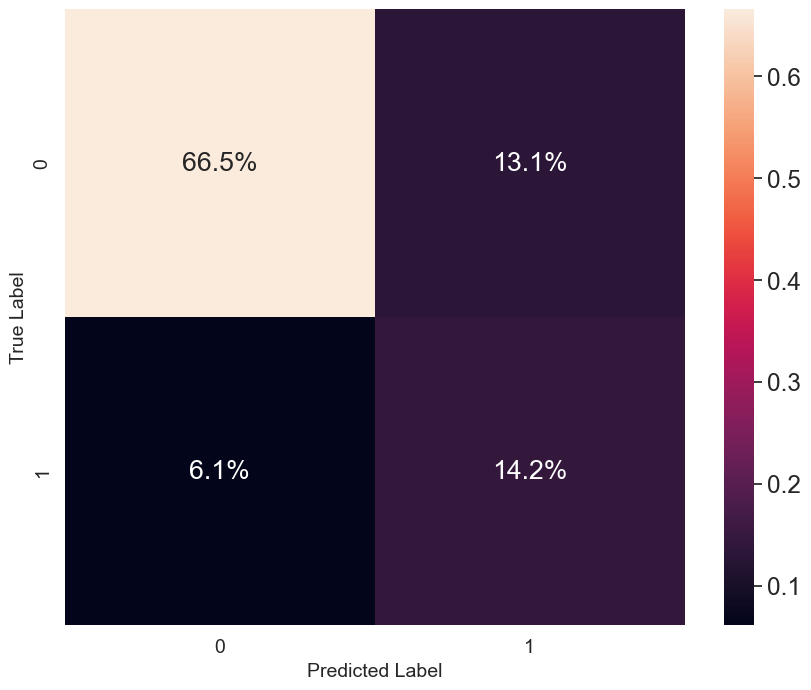

In [94]:
plot_confusion_matrix(y_test, y_hat)

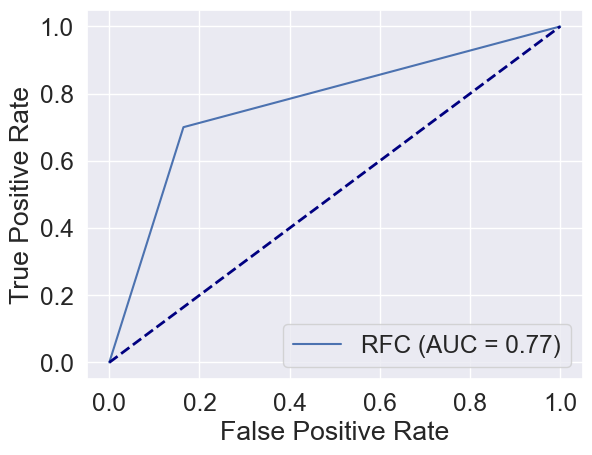

In [95]:
plot_roc_curve(y_test, y_hat, 'RFC')

🔎 **Observations:** Adding more data to the model increased the Recall and Accuracy scores. The percentage of false negatives dropped dramatically.

# Future Work

There still room for enhancement. We can:

- `SupportVectorClassifier` was promissing as mentioned in the above section.
- Tenure and NrOfProducts could be treated as categorical features as mentioned in the univariate section.
- Linear methods can be investigated further.

# Saving Models

In [96]:
import joblib

In [97]:
# Save the model
joblib.dump(model, '../Models/trained_model.joblib')

['../Models/trained_model.joblib']

In [99]:
# Save the joblib
joblib.dump(std_scaler, '../Models/scaler.joblib')

['../Models/scaler.joblib']